MSE: 598.3422048614176


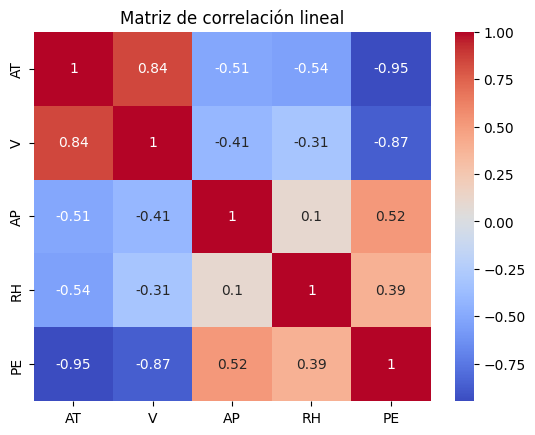

In [3]:
import pandas as pd
import numpy as np
from Fuentes.ClassNeuronaLineal import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

ALPHA = 0.01
MAX_ITE = 100000
COTA = 10e-6

DATOS_DIR   = '../../Datos/'
data = pd.read_csv(DATOS_DIR + 'CCPP.csv')
X = data.drop(columns=['PE']).values
Y = data['PE'].values.reshape(-1, 1)

scaler = StandardScaler()

data_scaler , targer_scaler= StandardScaler(), StandardScaler()
X = scaler.fit_transform(X)
T = targer_scaler.fit_transform(Y)

corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación lineal')

pesos = [
	-15.0,
	-4.0,
	-0.1,
	-2.0
]

nnp=NeuronaLineal(alpha=ALPHA, n_iter=MAX_ITE, cotaE=COTA,draw=0)
nnp.b_=454.75
nnp.w_=pesos
y_pred = nnp.predict(X)
mse = np.mean((Y - y_pred) ** 2)
print(f'MSE: {mse}')